In [1]:
import numpy as np
import os 
import arviz as az
import pandas as pd
import math
from scipy import stats
from scipy.stats import norm
import xarray as xr
import copy
import matplotlib.pyplot as plt
import math

#path = "/Users/laurenkerker/Documents/RGT/sparklyRGT"
path = "/Users/brett/sparklyRGT"
os.chdir(path)
os.chdir("sparklyRGT_tutorial") 
import sparklyRGT as rgt
path = os.getcwd()
os.chdir("../Pystan") 
from model_data import *
pd.set_option('display.max_rows',100)

I am being executed!


C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
#this function is for transforming the plots into the right parameter space
#(for parameters that got phi_approx in the model code)
def transform1(dataset):
    variable = norm.pdf(dataset.mu_pr.values)
    dataset.mu_pr.values = variable
    return dataset

def transform_beta(dataset):
    variable = norm.pdf(dataset.mu_pr.values)*100
    dataset.mu_pr.values = variable
    return dataset


In [45]:
os.getcwd()

'/Users/laurenkerker/Documents/RGT/sparklyRGT/Pystan'

In [3]:
os.chdir('nc_files')

In [4]:
loss_basic_fit = az.from_netcdf('loss_basic_fit.nc')
outcome_basic_fit = az.from_netcdf('outcome_basic_fit.nc')
random_basic_fit = az.from_netcdf('random_basic_fit.nc')
reverse_basic_fit = az.from_netcdf('reverse_basic_fit.nc')
standard_basic_fit = az.from_netcdf('standard_basic_fit.nc')
uncued_basic_fit = az.from_netcdf('uncued_basic_fit.nc')

loss_basicstar_fit = az.from_netcdf('loss_basic-star_fit.nc')
outcome_basicstar_fit = az.from_netcdf('outcome_basic-star_fit.nc')
random_basicstar_fit = az.from_netcdf('random_basic-star_fit.nc')
reverse_basicstar_fit = az.from_netcdf('reverse_basic-star_fit.nc')
standard_basicstar_fit = az.from_netcdf('standard_basic-star_fit.nc')
uncued_basicstar_fit = az.from_netcdf('uncued_basic-star_fit.nc')

loss_pscale_fit = az.from_netcdf('loss_pscale_fit.nc')
outcome_pscale_fit = az.from_netcdf('outcome_pscale_fit.nc')
random_pscale_fit = az.from_netcdf('random_pscale_fit.nc')
reverse_pscale_fit = az.from_netcdf('reverse_pscale_fit.nc')
standard_pscale_fit = az.from_netcdf('standard_pscale_fit.nc')
uncued_pscale_fit = az.from_netcdf('uncued_pscale_fit.nc')

loss_pscalestar_fit = az.from_netcdf('loss_pscale-star_fit.nc')
outcome_pscalestar_fit = az.from_netcdf('outcome_pscale-star_fit.nc')
random_pscalestar_fit = az.from_netcdf('random_pscale-star_fit.nc')
reverse_pscalestar_fit = az.from_netcdf('reverse_pscale-star_fit.nc')
standard_pscalestar_fit = az.from_netcdf('standard_pscale-star_fit.nc')
uncued_pscalestar_fit = az.from_netcdf('uncued_pscale-star_fit.nc')

loss_pindep_fit = az.from_netcdf('loss_pindep_fit.nc')
outcome_pindep_fit = az.from_netcdf('outcome_pindep_fit.nc')
random_pindep_fit = az.from_netcdf('random_pindep_fit.nc')
reverse_pindep_fit = az.from_netcdf('reverse_pindep_fit.nc')
standard_pindep_fit = az.from_netcdf('standard_pindep_fit.nc')
uncued_pindep_fit = az.from_netcdf('uncued_pindep_fit.nc')

loss_pindepstar_fit = az.from_netcdf('loss_pindep-star_fit.nc')
outcome_pindepstar_fit = az.from_netcdf('outcome_pindep-star_fit.nc')
random_pindepstar_fit = az.from_netcdf('random_pindep-star_fit.nc')
reverse_pindepstar_fit = az.from_netcdf('reverse_pindep-star_fit.nc')
standard_pindepstar_fit = az.from_netcdf('standard_pindep-star_fit.nc')
uncued_pindepstar_fit = az.from_netcdf('uncued_pindep-star_fit.nc')
os.chdir('..//cmdstan_output')

# all_rats_pindep_fit = az.from_netcdf('all-rats_pindep_fit_2.nc')
# random8sess_pindep_fit = az.from_netcdf('Random_pindep_fit_8sess_5000.nc')
# random2000_pindep_fit = az.from_netcdf('Random_pindep_fit_2000_ad99.nc')
# uncued2000_pindep_fit = az.from_netcdf('Classic_pindep_fit_2000_ad99.nc')

##my code for setting parameter names below assumes you'll call the independent models 'pindep' and 'pindepstar'

In [27]:
os.chdir('Documents\\Misc_lab_docs\\Sockeye documents')

In [29]:
all_rats_pindep_fit = az.from_netcdf('all-rats_pindep_fit_2.nc')

In [48]:
#index a specific mean value for a subject-level parameter estimate
#note: already transformed

beta = az.summary(all_rats_pindep_fit.posterior.beta)['mean']
etaPos = az.summary(all_rats_pindep_fit.posterior.etaPositive)['mean']
etaNeg = az.summary(all_rats_pindep_fit.posterior.etaNegative)['mean']
p1 = az.summary(all_rats_pindep_fit.posterior.p1)['mean']
p2 = az.summary(all_rats_pindep_fit.posterior.p2)['mean']
p3 = az.summary(all_rats_pindep_fit.posterior.p3)['mean']
p4 = az.summary(all_rats_pindep_fit.posterior.p4)['mean']

df = pd.DataFrame(columns=['Subject','Beta','etaPos','etaNeg','p1','p2','p3', 'p4'])
for i in range(0,165):
    beta_temp = beta[i]
    etaPos_temp = etaPos[i]
    etaNeg_temp = etaNeg[i]
    p1_temp = p1[i]
    p2_temp = p2[i]
    p3_temp = p3[i]
    p4_temp = p4[i]
    df_temp = {'Subject': i,'Beta': beta_temp,'etaPos': etaPos_temp,'etaNeg': etaNeg_temp,'p1': p1_temp,'p2': p2_temp,'p3': p3_temp, 'p4': p4_temp}
    df = df.append(df_temp, ignore_index = True)

# map temporary subject numbers to actual subject numbers
subject_mapping = pd.read_csv("subject_dict.csv", names=["Actual", "Temp"])
# map subject numbers to task
task_mapping = pd.read_csv("rgt_variant_subject_task.csv")

df["Actual Subject"] = np.nan
df["Task"] = np.nan
for index, subject in df.iterrows():
    subject_num = subject["Subject"]
    for index, row in subject_mapping.iterrows():
        if row["Temp"] == (subject_num +1):
            subject["Actual Subject"] = row["Actual"]
            
            for index, row_task in task_mapping.iterrows():
                if row_task["Subject"] == row["Actual"]:
                    subject["Task"] = row_task["task"].astype('int64')
df = df.sort_values(by=['Task'])
df.to_csv("all_rats_pindep_fit_with_mapping.csv", sep=',')

,Subject,Beta,etaPos,etaNeg,p1,p2,p3,p4
0,0.0,27.670,0.019,0.051,-0.200,0.033,0.022,0.028
1,1.0,26.177,0.014,0.352,-0.205,-0.041,0.026,0.022
2,2.0,26.555,0.049,0.311,0.073,0.018,-0.014,0.015
3,3.0,27.162,0.022,0.028,-0.678,0.017,-0.011,0.019
4,4.0,26.288,0.016,0.053,-0.315,-0.057,0.022,0.013
5,5.0,26.859,0.030,0.184,-0.491,-0.071,-0.004,0.024
6,6.0,26.331,0.026,0.073,-0.665,-0.035,-0.008,0.021
7,7.0,26.327,0.010,0.124,-0.260,-0.037,0.033,0.037
8,8.0,26.269,0.019,0.087,-0.454,-0.029,-0.000,0.036
9,9.0,26.722,0.016,0.034,-0.720,-0.027,0.030,0.013


In [21]:
#summary statistics for the model fit, including mean values of the posterior distribution 
pd.set_option('display.max_rows',350)
az.summary(random8sess_pindep_fit).head(10)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-1.925,0.032,-1.983,-1.864,0.002,0.001,444.0,1721.0,1.02
mu_pr[1],-2.105,0.059,-2.221,-1.994,0.004,0.003,324.0,518.0,1.02
mu_pr[2],-2.594,0.260,-2.991,-2.083,0.034,0.024,76.0,278.0,1.05
mu_pr[3],-0.987,0.622,-2.242,0.125,0.020,0.016,963.0,2052.0,1.01
mu_pr[4],0.568,0.478,-0.054,1.419,0.047,0.034,75.0,298.0,1.05
mu_pr[5],0.296,0.221,0.007,0.673,0.021,0.015,78.0,280.0,1.04
mu_pr[6],0.556,0.375,0.049,1.213,0.035,0.025,78.0,316.0,1.05
sigma[0],0.127,0.025,0.084,0.177,0.001,0.001,1001.0,2861.0,1.01
sigma[1],0.239,0.042,0.169,0.320,0.001,0.001,850.0,1443.0,1.00
sigma[2],0.321,0.121,0.156,0.571,0.016,0.012,69.0,563.0,1.05


In [5]:
az.summary(outcome_pindep_fit).head(15)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-2.113,0.042,-2.189,-2.031,0.001,0.001,1628.0,2154.0,1.0
mu_pr[1],-1.899,0.063,-2.020,-1.785,0.001,0.001,1851.0,2506.0,1.0
mu_pr[2],-1.870,0.175,-2.185,-1.540,0.006,0.004,808.0,1052.0,1.0
mu_pr[3],-0.707,0.266,-1.210,-0.216,0.007,0.005,1397.0,2149.0,1.0
mu_pr[4],-0.058,0.052,-0.148,0.051,0.001,0.001,2033.0,1723.0,1.0
mu_pr[5],0.024,0.022,-0.013,0.066,0.001,0.001,1004.0,1362.0,1.0
mu_pr[6],0.048,0.022,0.013,0.088,0.001,0.001,945.0,1334.0,1.0
sigma[0],0.148,0.034,0.089,0.215,0.001,0.001,1668.0,2404.0,1.0
sigma[1],0.243,0.056,0.148,0.347,0.001,0.001,1544.0,2281.0,1.0
sigma[2],0.468,0.132,0.243,0.701,0.004,0.003,908.0,1494.0,1.0


In [7]:
az.summary(uncued_pindep_fit).head(10)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-2.012,0.044,-2.095,-1.927,0.001,0.001,959.0,1559.0,1.00
mu_pr[1],-2.138,0.082,-2.299,-1.986,0.004,0.003,450.0,1031.0,1.01
mu_pr[2],-2.478,0.158,-2.807,-2.208,0.010,0.007,250.0,575.0,1.01
mu_pr[3],-1.742,0.605,-2.917,-0.648,0.014,0.010,1813.0,1916.0,1.00
mu_pr[4],0.342,0.275,-0.028,0.870,0.017,0.012,284.0,539.0,1.01
mu_pr[5],0.310,0.168,0.093,0.638,0.010,0.007,238.0,522.0,1.01
mu_pr[6],0.271,0.140,0.087,0.551,0.008,0.006,280.0,472.0,1.01
sigma[0],0.178,0.040,0.113,0.254,0.001,0.001,1091.0,1355.0,1.00
sigma[1],0.361,0.070,0.241,0.489,0.002,0.002,844.0,1311.0,1.00
sigma[2],0.321,0.073,0.190,0.454,0.003,0.002,795.0,1403.0,1.00


In [ ]:
#to get the sigma values: 
az.summary(uncued_pindep_fit)['mean'][7]

In [ ]:
uncued_pindep_fit

In [ ]:
standard_pindep_fit.posterior.etaNegative[0]

In [ ]:
loss_pindep_fit.posterior.etaNegative[0]

In [25]:
az.summary(random2000_pindep_fit).head(10)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-1.940,0.039,-2.010,-1.863,0.001,0.001,1418.0,2634.0,1.0
mu_pr[1],-2.003,0.050,-2.098,-1.907,0.002,0.001,979.0,1812.0,1.0
mu_pr[2],-2.723,0.148,-2.987,-2.482,0.007,0.005,597.0,555.0,1.0
mu_pr[3],-1.095,0.738,-2.486,0.291,0.014,0.010,2719.0,3733.0,1.0
mu_pr[4],0.911,0.438,0.193,1.824,0.016,0.011,706.0,616.0,1.0
mu_pr[5],0.436,0.208,0.101,0.856,0.008,0.006,627.0,603.0,1.0
mu_pr[6],0.721,0.321,0.196,1.369,0.012,0.009,620.0,567.0,1.0
sigma[0],0.172,0.032,0.116,0.233,0.001,0.001,1578.0,3722.0,1.0
sigma[1],0.237,0.041,0.163,0.313,0.001,0.001,1522.0,3451.0,1.0
sigma[2],0.251,0.077,0.144,0.372,0.004,0.003,904.0,700.0,1.0


In [ ]:
az.plot_pair(random8sess_pindep_fit, divergences = True, var_names = ['mu_pr'])

In [ ]:
#print all the values for each parameter for each draw for each chain (1000 per 4 chains)
random2000_pindep_fit.posterior.mu_pr.values

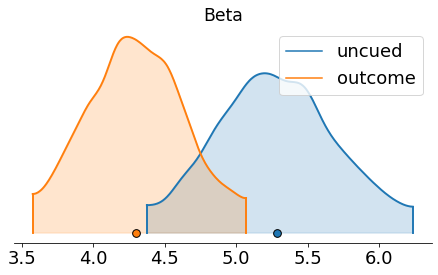

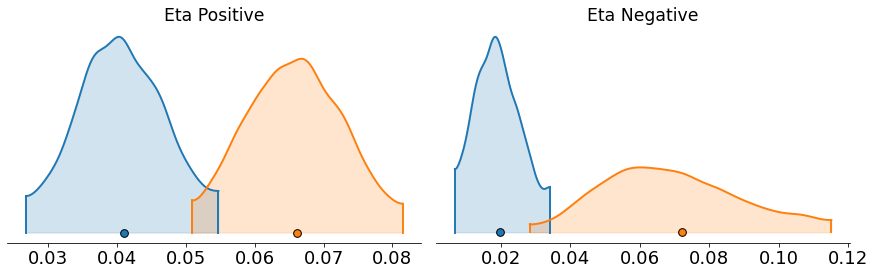

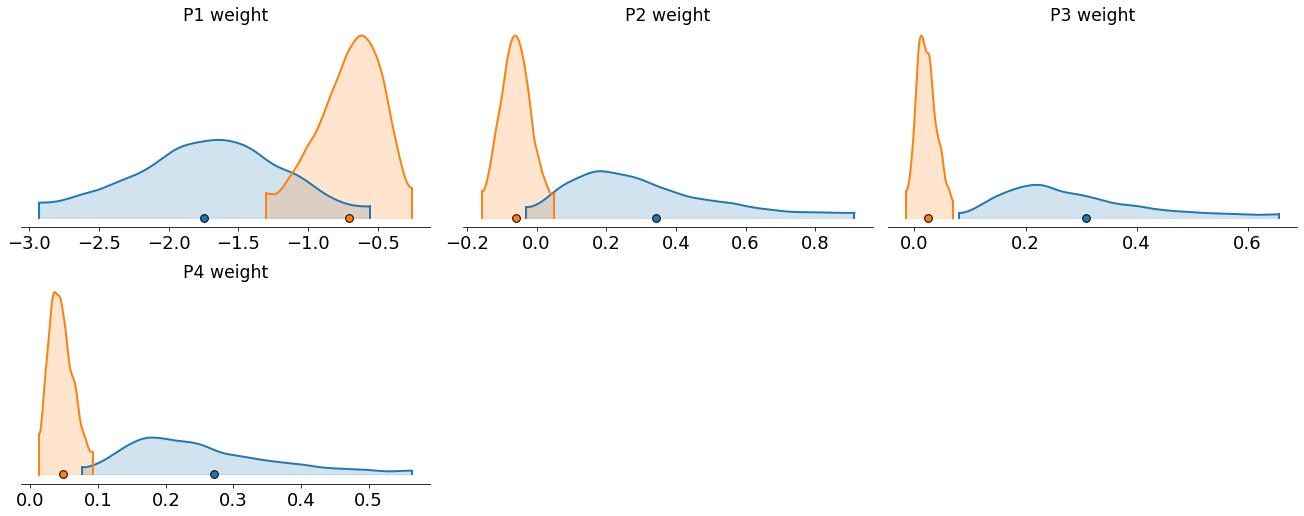

In [26]:
#plot the posterior distributions for group parameters, for diff groups 

def graph(dataset, model, color_cycle = None):

    
    transforms = ["transform_beta", "transform1", "none"]
    
    for transform in transforms:
        prop_cycle = plt.rcParams['axes.prop_cycle']
        if color_cycle == None:
            color_cycle = prop_cycle.by_key()['color']
        model_names = []
        for i in range(len(dataset)):
            model_names.append(globals()[dataset[i] + '_' + model + '_fit'].copy())
        if transform == "transform1":
            ax = az.plot_density(model_names, 
                            var_names = 'mu_pr',
                            data_labels = dataset,
                            shade = 0.2, 
                            hdi_prob = 0.95,
                            figsize = [18,10],
                            textsize = 18,
                            transform = transform1,
                            colors = color_cycle)
        elif transform == "transform_beta":
            ax = az.plot_density(model_names, 
                            var_names = 'mu_pr',
                            data_labels = dataset,
                            shade = 0.2, 
                            hdi_prob = 0.95,
                            figsize = [18,10],
                            textsize = 18,
                            transform = transform_beta,
                            colors = color_cycle)
        else:
            ax = az.plot_density(model_names, 
                    var_names = 'mu_pr',
                    data_labels = dataset,
                    shade = 0.2, 
                    figsize = [18,10],
                    hdi_prob = 0.95,
                    textsize = 18,
                    colors = color_cycle)


        #for setting the titles of the figure:
        if model == 'pindep':
            params = ['Beta', 'Eta Positive', 'Eta Negative', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
        elif model == 'pindepstar':
            params = ['Beta', 'Eta', 'P1 weight', 'P2 weight', 'P3 weight', 'P4 weight']
        elif 'star' in model:
            #this list will work for both basicstar and pscalestar
            params = ['Beta', 'Eta', 'm', 'b']
        else:
            #this list will work for both basic and pscale
            params = ['Beta', 'Eta positive', 'Eta negative', 'm', 'b']

        row = list(range(0,math.ceil(len(params)/3))) 
        pos = list(range(0,3))
        title_num = 0

        # sets title for each graph, with parameter name
        try:
            for i in row:
                for j in pos:
                    ax[i][j].set_title(params[title_num], fontsize = 'xx-large')
                    title_num +=1
        except:
            pass
        
        #removes graphs that are not involved in each transform
        if transform == "transform_beta":
            for i in range(0,3):
                for j in range(0,3):
                    try:
                        if ax[i][j] != ax[0][0]:
                            ax[i][j].remove()
                    except:
                        continue
        elif transform == "transform1":
            for i in range(0,3):
                for j in range(0,3):
                    try:
                        if "star" not in model:
                            if (ax[i][j] != ax[0][1] and ax[i][j] != ax[0][2]):
                                ax[i][j].remove()
                        else:
                            if (ax[i][j] != ax[0][1]):
                                ax[i][j].remove()
                    except:
                        continue
        else:
            for i in range(0,3):
                for j in range(0,3):
                    try:
                        if (i == 0):
                            ax[i][j].remove()
                    except:
                        continue

graph(['uncued','outcome'],'pindep')

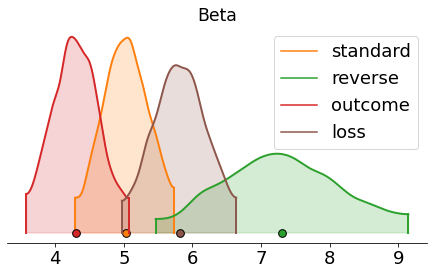

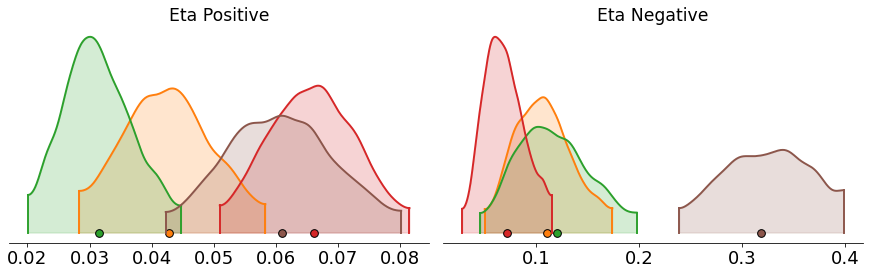

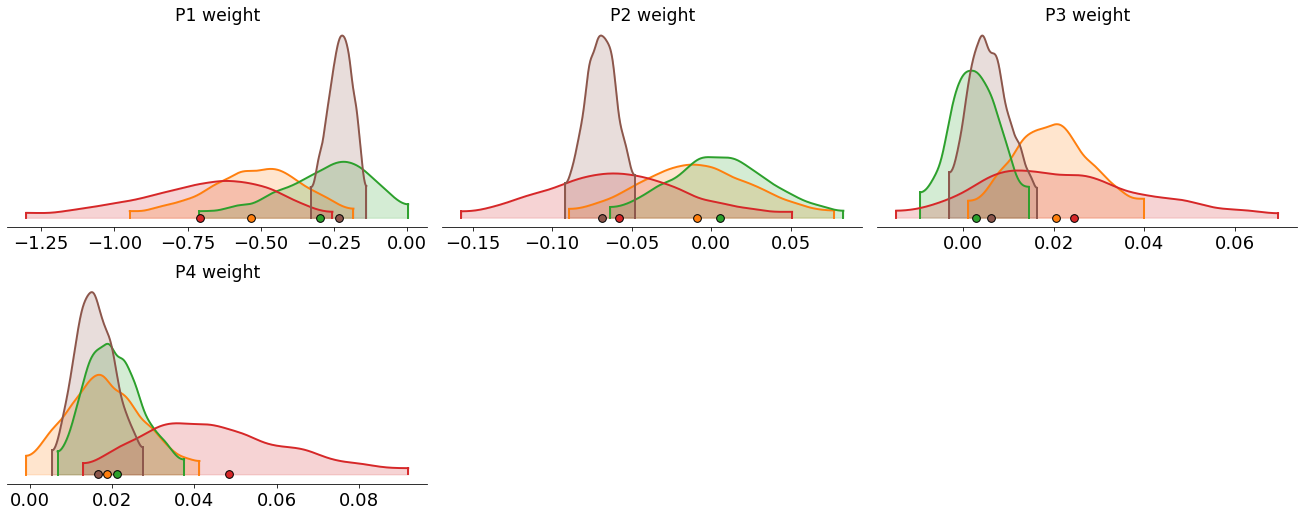

In [27]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

graph(['standard','reverse','outcome','loss'],'pindep', color_cycle = [colors[1],colors[2],colors[3],colors[5]])

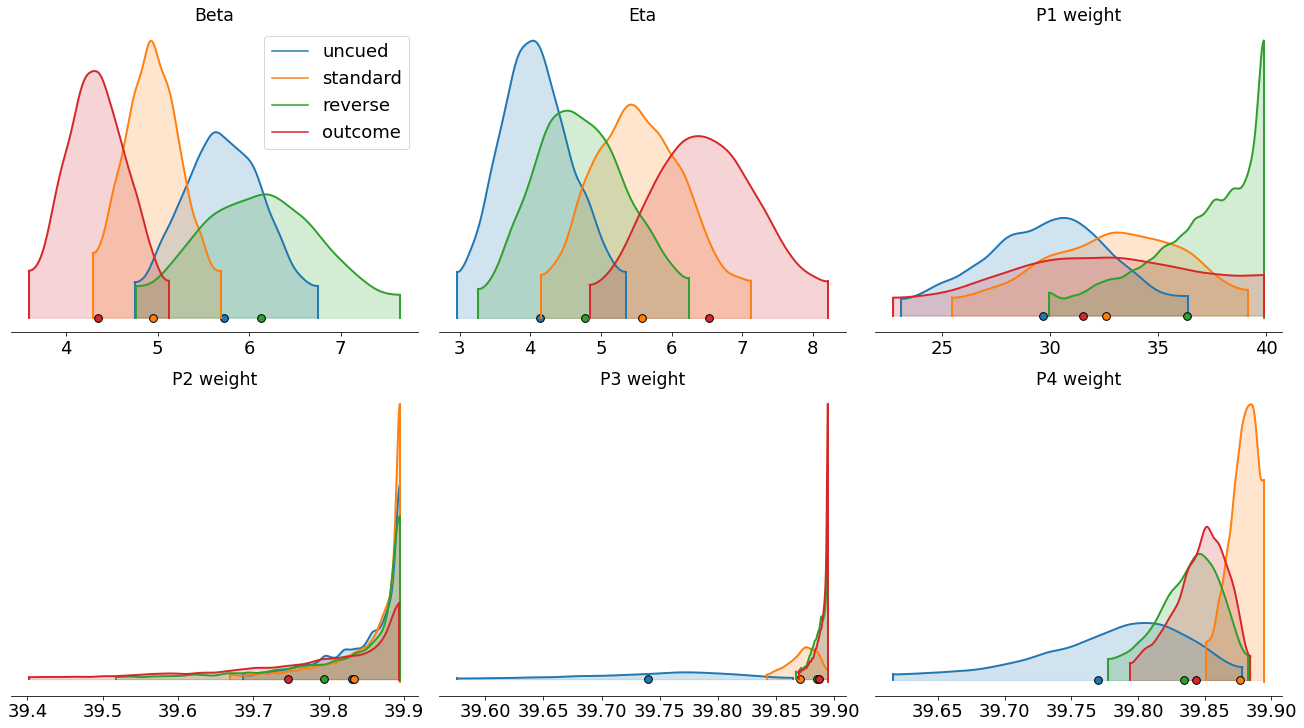

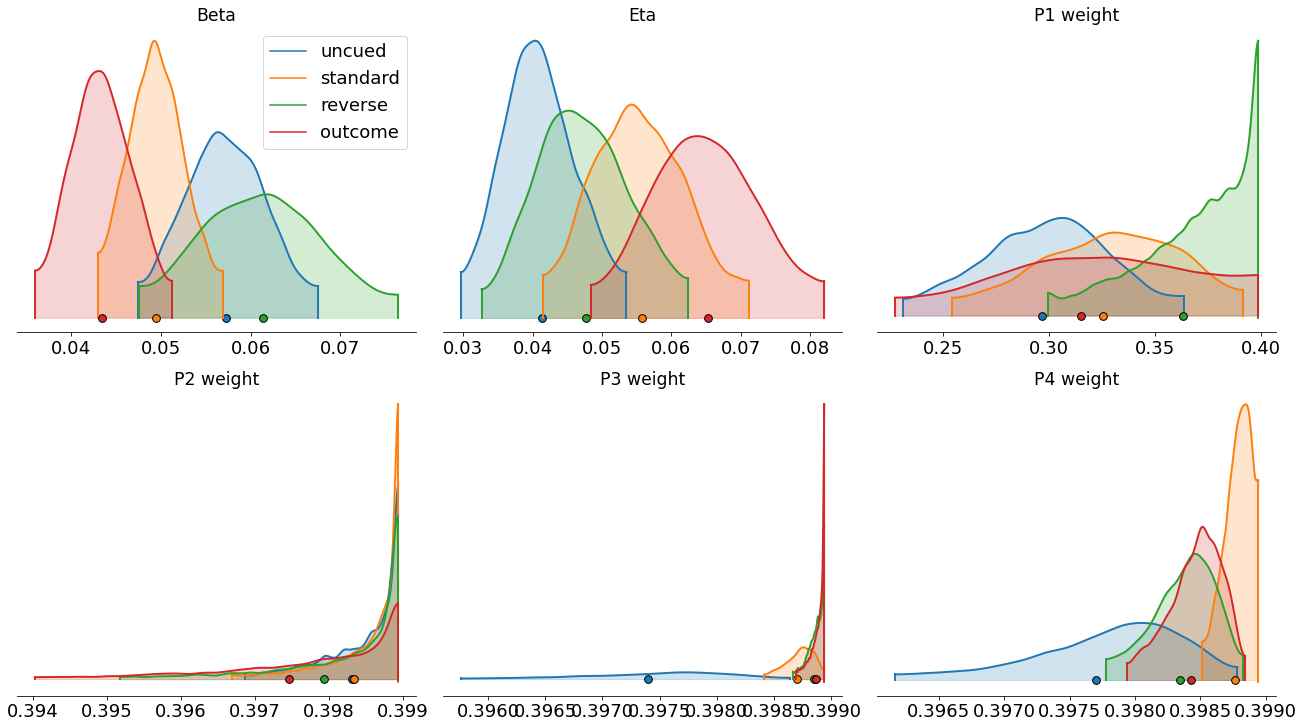

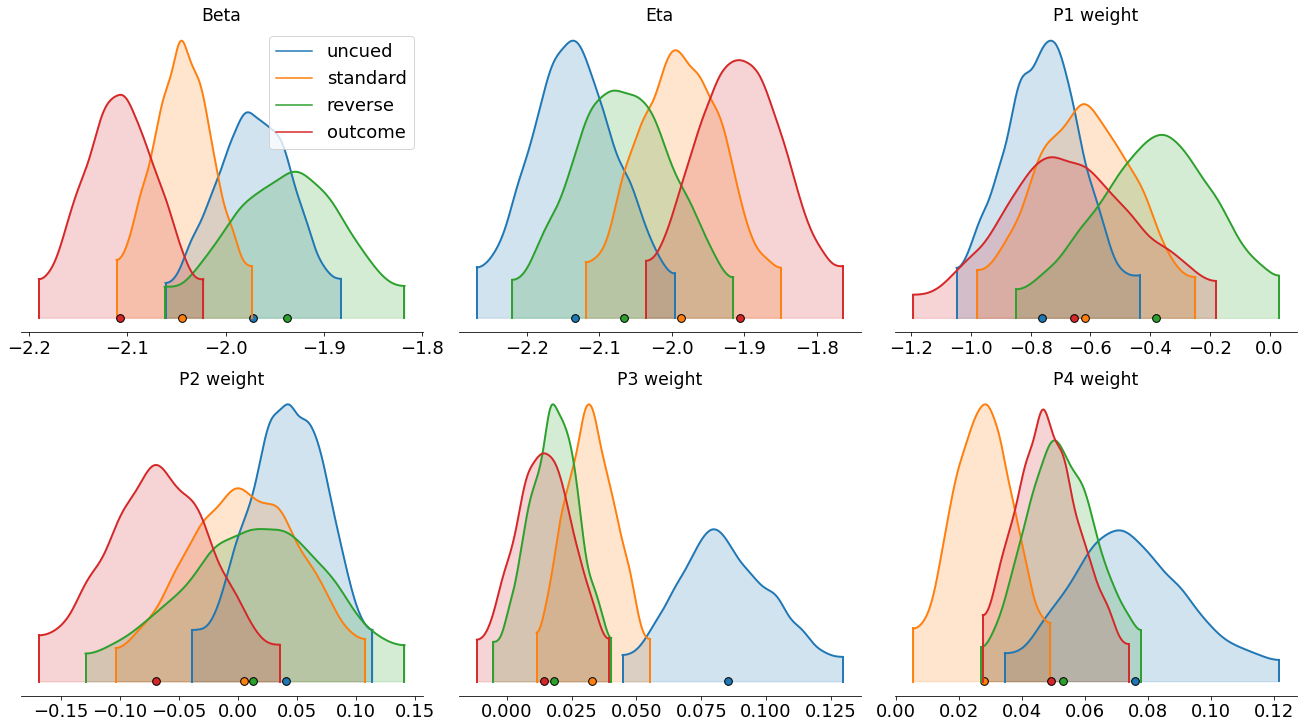

In [25]:
graph(['uncued','standard','reverse','outcome'],'pindepstar', color_cycle = [colors[0],colors[1],colors[2],colors[3]])

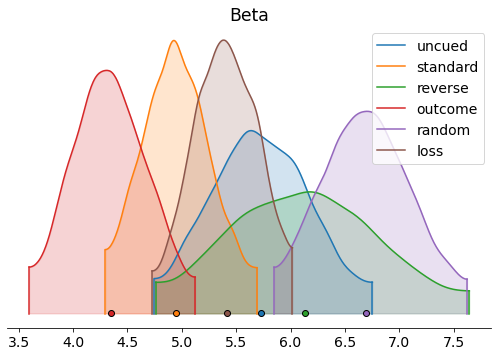

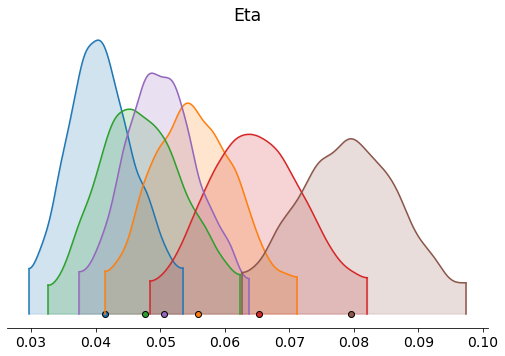

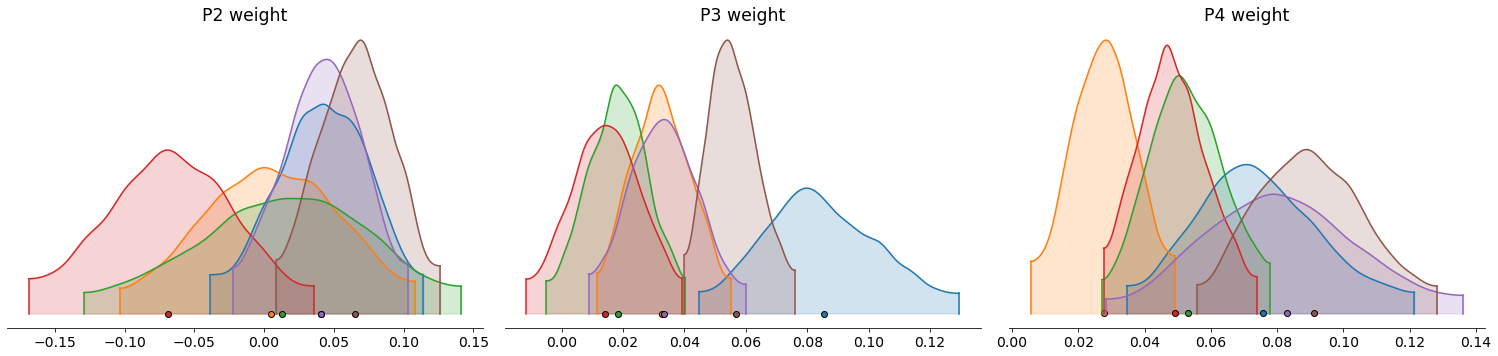

In [54]:
graph(['uncued','standard','reverse','outcome','random','loss'],'pindepstar')

0 0
0 1
1 0
1 1
2 0
2 1


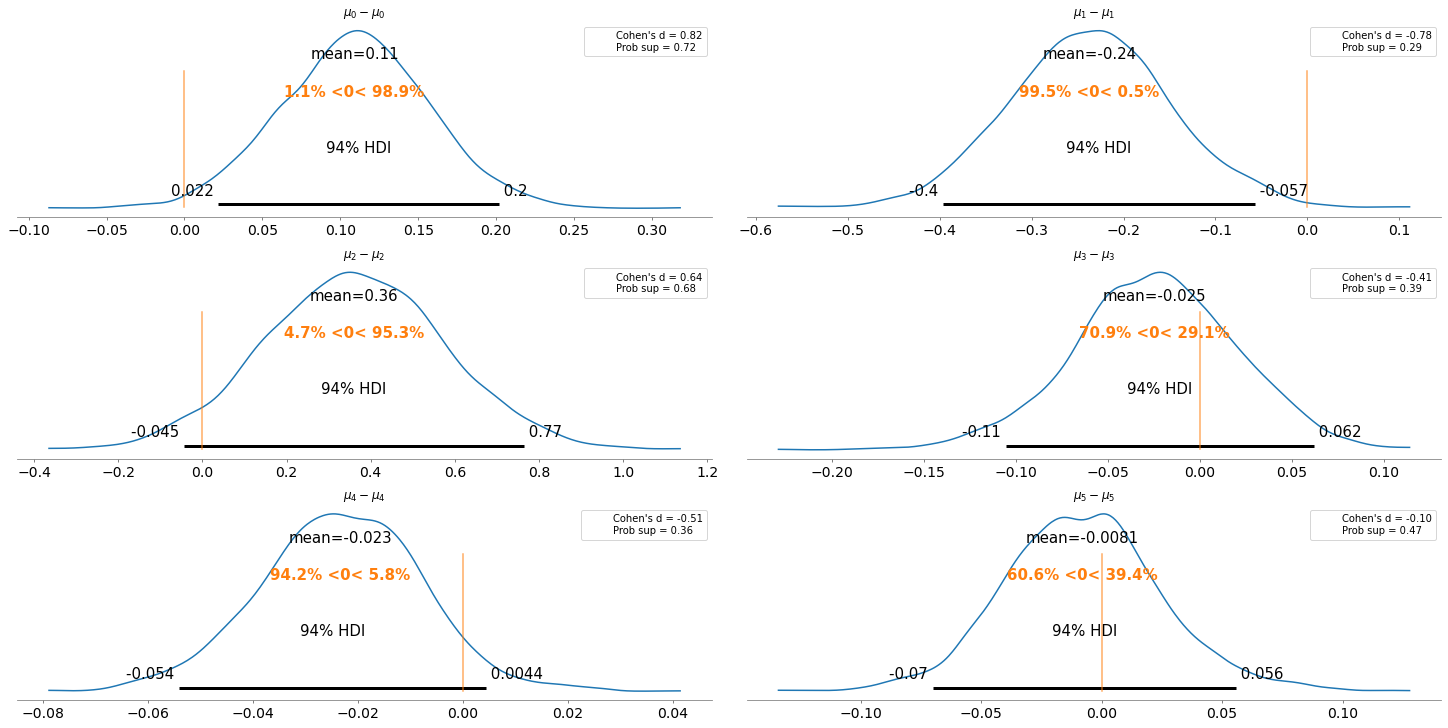

In [46]:
sample_diff(6, random_pindepstar_fit, loss_pindepstar_fit)

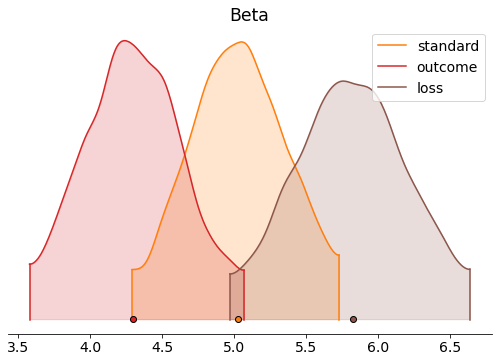

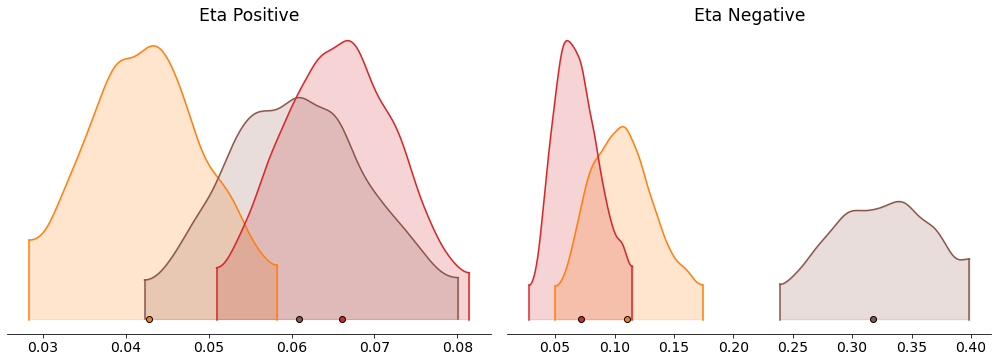

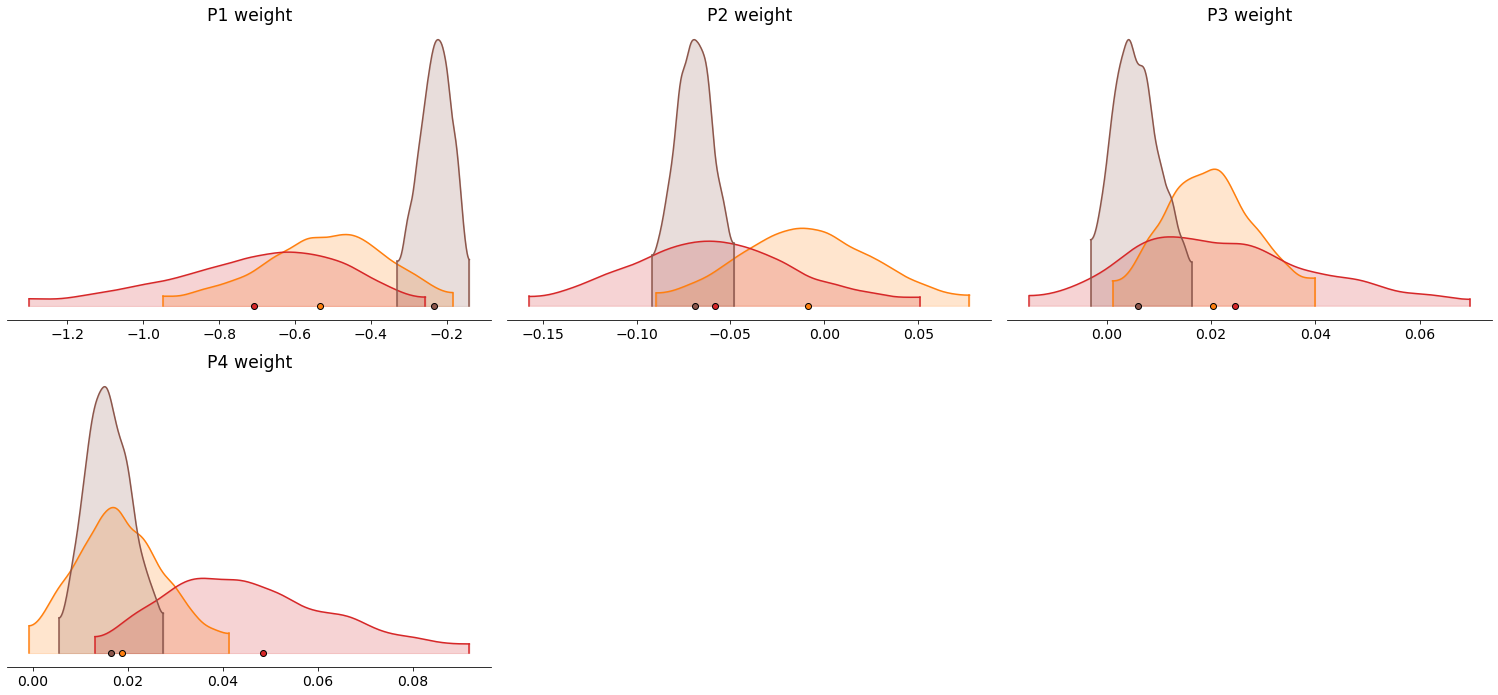

In [32]:
graph(['standard','outcome','loss'],'pindep', color_cycle = [colors[1],colors[3],colors[5]])

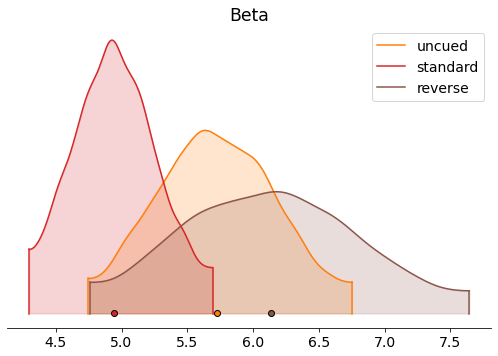

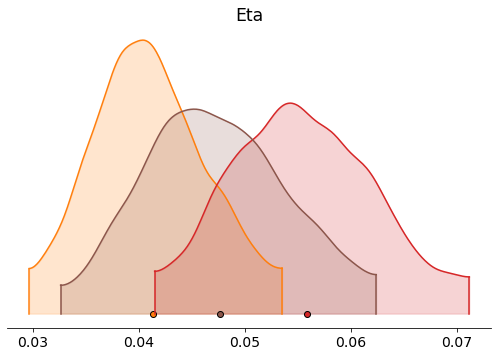

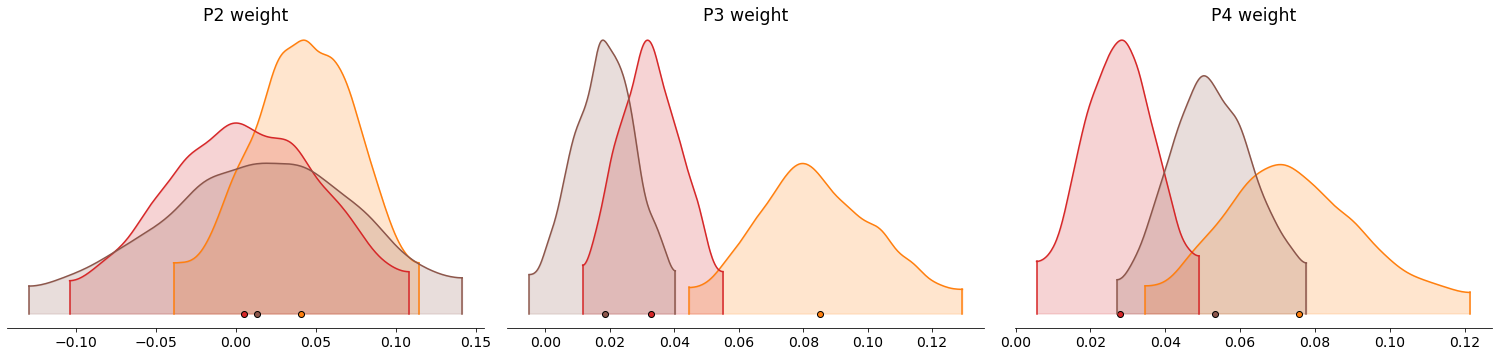

In [33]:
graph(['uncued','standard','reverse'],'pindepstar', color_cycle = [colors[1],colors[3],colors[5]])

array([[<AxesSubplot:title={'center':'p3'}>,
        <AxesSubplot:title={'center':'p3'}>]], dtype=object)

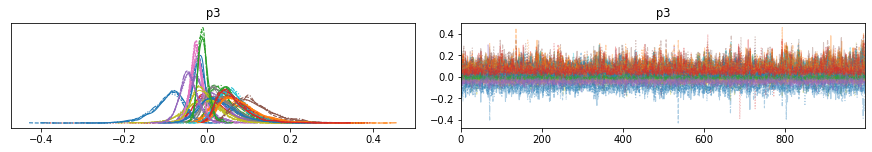

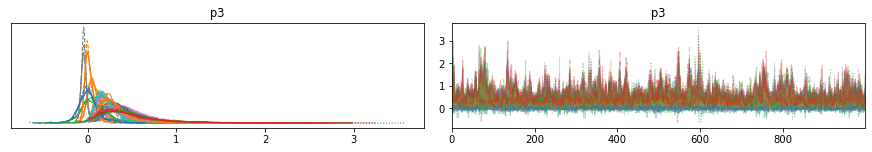

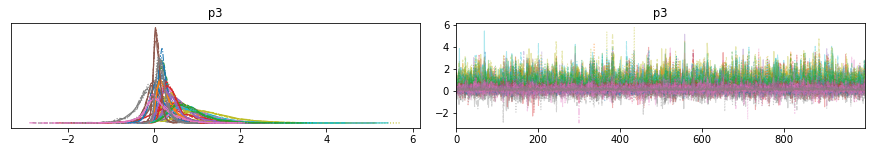

In [17]:

az.plot_trace(outcome_pindep_fit.posterior.p3)
az.plot_trace(uncued_pindep_fit.posterior.p3)
az.plot_trace(random_pindep_fit.posterior.p3)
#az.plot_trace(outcome_pindep_fit.posterior.mu_pr,coords = {'mu_pr_dim_0':[2]})
# az.plot_trace(random_pindep_fit.posterior.mu_pr,coords = {'mu_pr_dim_0':[4]})
# az.plot_trace(random_pindep_fit.posterior.mu_pr,coords = {'mu_pr_dim_0':[5]})
# az.plot_trace(random_pindep_fit.posterior.mu_pr,coords = {'mu_pr_dim_0':[6]})

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

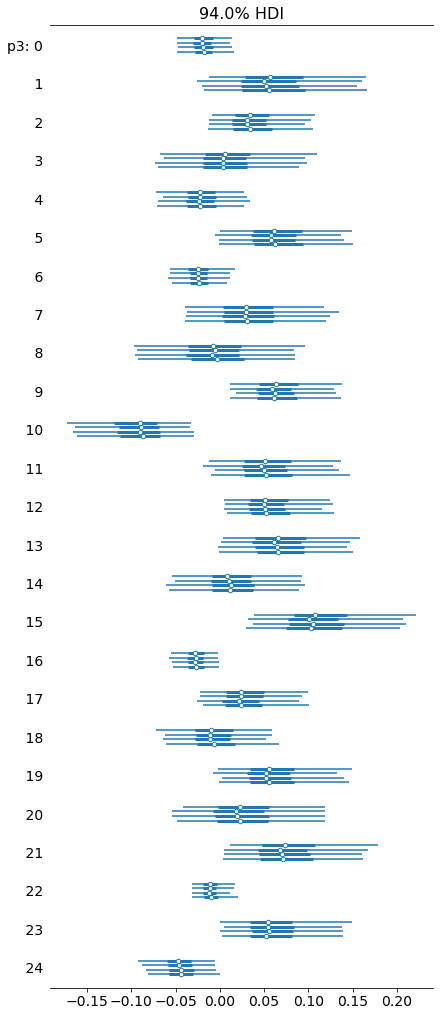

In [39]:
az.plot_forest(outcome_pindep_fit.posterior.p3)

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

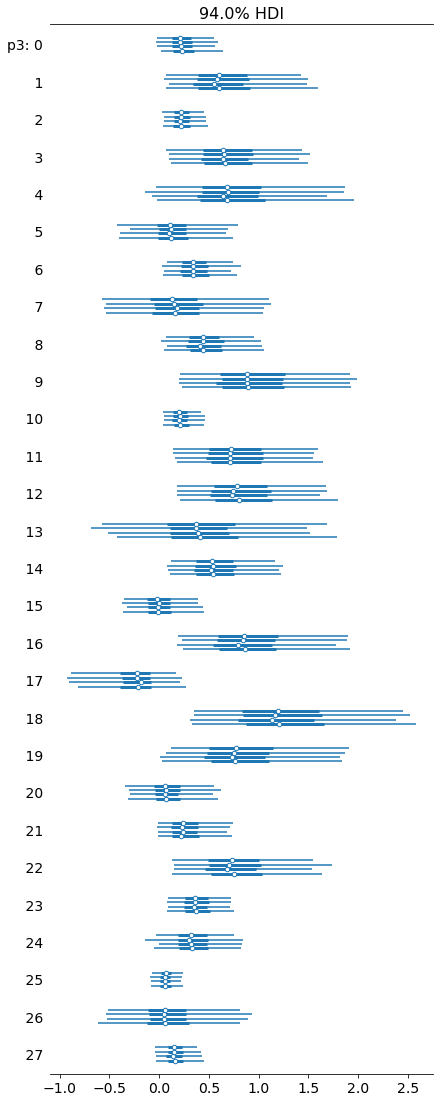

In [14]:
az.plot_forest(random_pindep_fit.posterior.p3)

In [41]:
pd.set_option('display.max_rows',450)
az.summary(random_pindep_fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-1.938,0.037,-2.010,-1.873,0.001,0.001,1777.0,2374.0,1.00
mu_pr[1],-2.000,0.050,-2.096,-1.908,0.001,0.001,1419.0,1884.0,1.00
mu_pr[2],-2.742,0.128,-2.990,-2.509,0.004,0.003,1272.0,1248.0,1.00
mu_pr[3],-1.080,0.756,-2.442,0.355,0.014,0.010,3024.0,2609.0,1.00
mu_pr[4],0.957,0.441,0.191,1.741,0.011,0.008,1569.0,1700.0,1.00
mu_pr[5],0.456,0.209,0.103,0.826,0.006,0.004,1315.0,1861.0,1.01
mu_pr[6],0.749,0.316,0.239,1.341,0.009,0.006,1224.0,1505.0,1.01
sigma[0],0.173,0.032,0.119,0.236,0.001,0.001,1414.0,2446.0,1.00
sigma[1],0.234,0.039,0.164,0.308,0.001,0.001,1589.0,2109.0,1.00
sigma[2],0.242,0.060,0.139,0.352,0.002,0.001,1340.0,2147.0,1.00


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

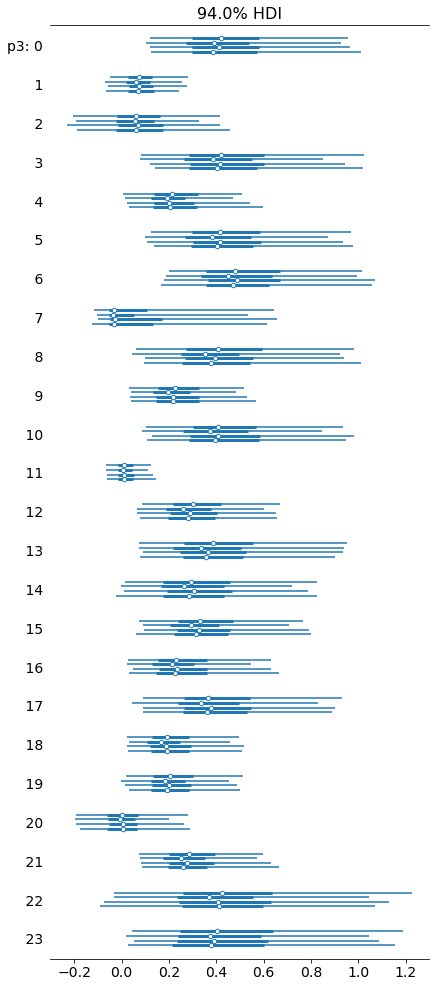

In [18]:
az.plot_forest(uncued_pindep_fit.posterior.p3)

In [18]:
def round_up(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

def sample_diff(num_params, fit1, fit2):
    """Takes in num_params (ex. basic = 4), fit1 and fit2 (4 chains) and outputs the sample difference distribution (fit1 - fit2) for the group parameters
    Also outputs Cohen's d, probability of superiority (Prob Sup)... and the distribution's mean, 94% HDI, and probability density to the left and right of 0
    If the 94% HDI does not contain 0, then the parameters are credibly different"""
    
    #variables
    dist = stats.norm()
    _, ax = plt.subplots(round_up(num_params/2), 2, figsize=(20, 10), constrained_layout=True)
    comparisons = [(j) for j in range(num_params)]
    pos = [(k, l) for k in range(round_up(num_params/2)) for l in range(2)]
    #comparisons
    for (j), (k, l) in zip(comparisons, pos):
        print(k,l)
        means_diff = fit1.posterior.mu_pr[:,:,j] - fit2.posterior.mu_pr[:,:,j] #means_diff holds the distribution of the sample difference 
        d_cohen = (means_diff / np.sqrt((fit1.posterior.sigma[:,:,j]**2 + fit2.posterior.sigma[:,:,j]**2) / 2)).mean() 
        ps = dist.cdf(d_cohen/(2**0.5))
        az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l]) #plots posteriors in 2D array of locations: for example, mu_0 - mu_0 will be in the 0,0 box (top left)
        ax[k, l].set_title(f'$\mu_{j}-\mu_{j}$')
        ax[k, l].plot(0, label=f"Cohen's d = {d_cohen.values:.2f}\nProb sup = {ps:.2f}", alpha=0)
        ax[k, l].legend();

0 0
0 1
1 0
1 1
2 0
2 1


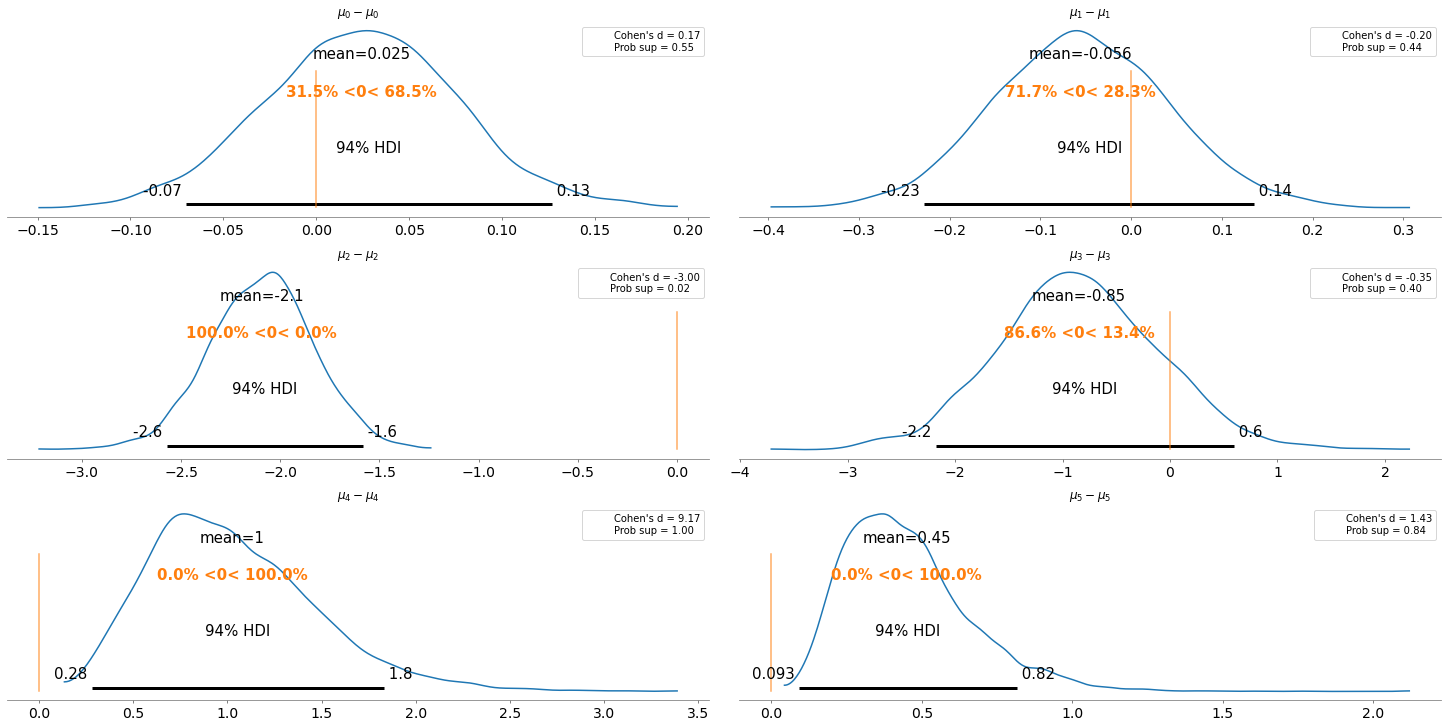

In [19]:
sample_diff(6, random_pindep_fit, loss_pindep_fit)